In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import pandas as pd
train = pd.read_csv('data/processed_train.csv')
test = pd.read_csv('data/processed_test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         27480 non-null  object
 1   sentiment    27480 non-null  int64 
 2   Age of User  27480 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 644.2+ KB


In [3]:
vec=TfidfVectorizer(max_features=10000)
x_train=vec.fit_transform(train['text']).toarray()
x_test=vec.transform(test['text']).toarray()
y_train=train['sentiment']
y_test=test['sentiment']

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
def model_eval(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Accuracy Score is : {accuracy_score(y_test,y_pred)}')
    print(f'Classification_report')
    print(classification_report(y_test,y_pred))
    print(f'Confusion Matrix')
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Accuracy Score is : 0.7088285229202037
Classification_report
              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1001
           1       0.64      0.77      0.70      1430
           2       0.81      0.70      0.75      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534

Confusion Matrix


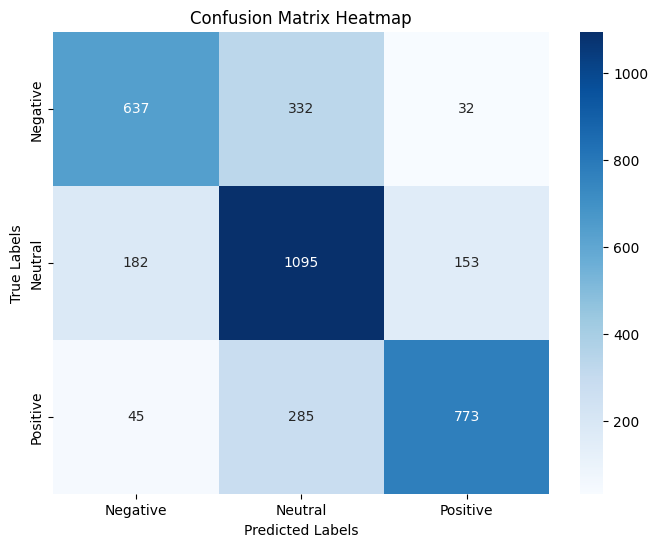

In [5]:
model_eval(LogisticRegression(max_iter=500))

In [6]:
import numpy as np
x_train=np.hstack((x_train,train['Age of User'].values.reshape(-1,1)))
x_test=np.hstack((x_test,test['Age of User'].values.reshape(-1,1)))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score is : 0.7059988681380871
Classification_report
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1001
           1       0.64      0.74      0.69      1430
           2       0.81      0.71      0.75      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.70      0.71      3534
weighted avg       0.71      0.71      0.71      3534

Confusion Matrix


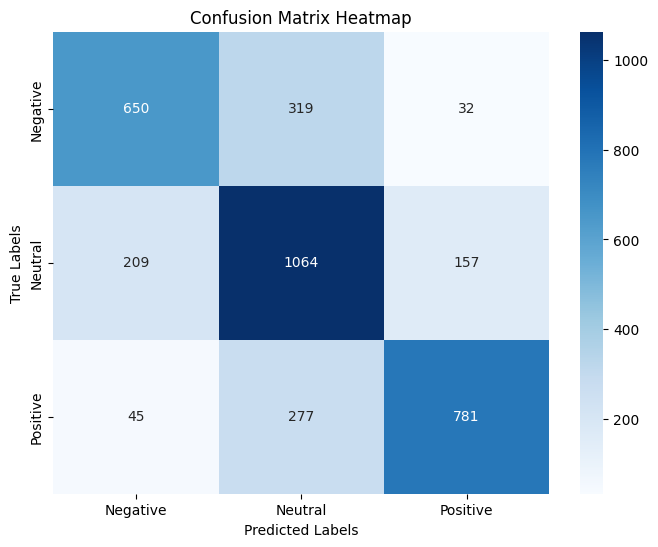

In [7]:
model_eval(LogisticRegression(max_iter=500))